In [6]:
import geopandas as gpd
fp = 'C:/Users/michi/Documents/Blok 2 Jaar 4/' 
gdf = gpd.read_file("Soudal_location.csv")
gdf = gpd.GeoDataFrame(gdf, geometry=gpd.points_from_xy(gdf['x-coordinate'], gdf['y-coordinate']))
gdf.crs = 'epsg:4326'
display(gdf)

,ID,Country,City,Plant type,ZIP code,Receiving_plant,x-coordinate,y-coordinate,geometry
0,1,Portugal,Lissabon,Receiving plant,2710-207,2200,-9.369216,38.757301,POINT (-9.36922 38.75730)
1,2,Spain,Alovera,Receiving plant,19208,1900,-3.243162431,40.57675934,POINT (-3.24316 40.57676)
2,3,Italy,Cologno Monzese,Receiving plant,20093,2000,9.281575673,45.54113003,POINT (9.28158 45.54113)
3,4,France,Blyes,Receiving plant,1150,1800,5.261173337,45.83747369,POINT (5.26117 45.83747)
4,5,Belgium,Turnhout,Producing plant,2300,2300,4.928540898,51.29525785,POINT (4.92854 51.29526)
5,6,Latvia,Dobele,Producing plant,3701,3701,23.30237845,56.62518423,POINT (23.30238 56.62518)
6,7,Poland,Pionki,Producing plant,26-670,26-670,21.45811508,51.46902482,POINT (21.45812 51.46902)
7,8,Portugal,Lissabon,Producing plant,2710-207,2200,-9.369216,38.757301,POINT (-9.36922 38.75730)
8,9,Slovenia,Srpenica,Producing plant,5224,5224,13.5166732,46.28409136,POINT (13.51667 46.28409)
9,10,Spain,Alovera,Producing plant,19208,1900,-3.243162431,40.57675934,POINT (-3.24316 40.57676)


In [11]:
import pandas as pd
df = pd.read_csv("C:/BO Soudal/Data/Customers/Customers_orders.csv", sep=';')
display(df)
gdf2 = gpd.read_file("C:/BO Soudal/Data/Customers/Postcode_points.gpkg")
# display(gdf2)

,Order_Ref,Plant,Quantity_Delivered,UnitOfMeasurement,Delivery_Date,Material,Customer_ZIP,Customer_Country,Postal_code
0,0003756276-000050,2000,24,ST,07/03/2023,/F/DgCPFDNZN1azX/oHk5w==,20091,IT,IT_ 20091
1,0003772875-000070,2200,16,ST,27/01/2023,UOW1VWzCcSPreGJdm1U8ew==,2530-094,PT,PT_ 2530-094
2,0003779892-000010,1800,2,ST,25/01/2023,S6gbRzm93QwmTC66tN4rkw==,34540,FR,FR_ 34540
3,0003779948-000010,1800,1,ST,24/01/2023,S6gbRzm93QwmTC66tN4rkw==,84120,FR,FR_ 84120
4,0003863252-000040,2200,12,ST,21/03/2023,alQs2E90jINF0sFVnXA8Iw==,3885-809,PT,PT_ 3885-809
...,...,...,...,...,...,...,...,...,...
808734,0004621770-000080,1900,6,ST,27/12/2023,GIonltmJLnn+c1RDBFOItw==,28805,ES,ES_ 28805
808735,0004621770-000110,1900,24,ST,27/12/2023,IjaLXM7rRHrMnqmopm6fmw==,28805,ES,ES_ 28805
808736,0004621827-000110,1900,24,ST,27/12/2023,sjDXMZOqDDdFSffPj0x7jg==,2151,ES,ES_ 2151
808737,0004621947-000050,2200,12,ST,27/12/2023,7Wnt613DiiVNdAru2DRVfA==,2560-686,PT,PT_ 2560-686


KeyboardInterrupt: 

In [ ]:
customers = pd.merge(gdf2, df, left_on='PC_CNTR', right_on='Postal_code', how='left')

<Axes: >

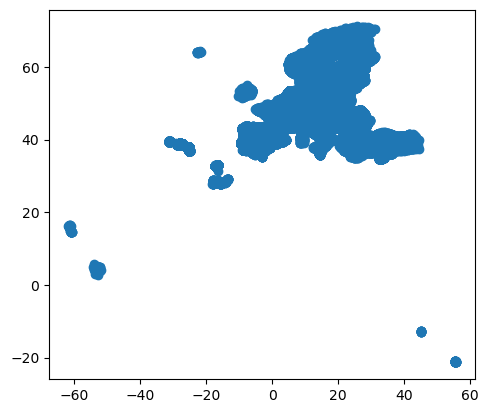

In [14]:
customers.plot()

In [24]:
customers.dtypes
customers.drop(['OBJECTID'], axis=1)
customers.to_file("C:/BO Soudal/Data/Customers/Customers_map.gpkg", driver="GPKG")

AttributeError: module 'pandas' has no attribute 'Int64Index'

In [2]:
import folium
m = folium.Map(location=[20, 0], zoom_start=3, height=500)
for i in range(len(gdf)):
    popup_content = f"<b>{gdf.iloc[i]['City']}</b>:<br>{gdf.iloc[i]['Plant type']}"
    folium.Marker(location=[gdf.iloc[i]['y-coordinate'], gdf.iloc[i]['x-coordinate']], popup=popup_content).add_to(m)
m

In [ ]:
# data from unemployement and household income is from 2019!!!

# Script for rasterizing vector datasets

# import pandas as pd
# from geocube.api.core import make_geocube
# from geocube.rasterize import rasterize_image
# from functools import partial
# from rasterio.enums import MergeAlg


# hhi = gpd.read_file(f"{fp}anothertestrailways.gpkg")
# hhi = hhi.to_crs('EPSG:3035')
# final_raster = make_geocube(
# vector_data=hhi,
# measurements=["FINAL_VALUE"],
# resolution=(-500, 500),
# fill = 0)
    
# final_raster.rio.to_raster('C:/Users/michi/Documents/Blok 2 Jaar 4/final_railroadstest.tif')

In [ ]:
# Script for retrieving x data from y region/country

# import osmnx as ox
# cf = '["highway" ~"motorway"]' 
# # ~"trunk"
# G = ox.graph_from_place('Hungary', simplify=True, custom_filter=cf)
# gdfhighways = ox.graph_to_gdfs(G, nodes=False)
# gdfhighways = gdfhighways.drop(columns=['osmid', 'lanes', 'maxspeed', 'oneway', 'ref', 'name', 'highway', 'reversed', 'length', 'bridge'])
# gdfhighways['id'] = range(len(gdfhighways))
# gdfhighways = gdfhighways.set_index('id')
# display(gdfhighways)
# gdfhighways.plot()
# type(gdfhighways)
# gdfhighways.to_file("C:/Users/michi/Documents/Blok 2 Jaar 4/highway networks/highwayshungary.gpkg", driver="GPKG")